In [1]:
from src.tensor import Tensor
import src.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST
np.set_printoptions(suppress=True)

In [2]:
mndata = MNIST('./mnist_dataset/')
mndata.gz = True
training, test = mndata.load_training(), mndata.load_testing()

In [3]:
X = np.array(training[0] + test[0], dtype=float)
Y = np.array(list(training[1]) + list(test[1]), dtype=int)

# Scale down pixels from 0-255 to 0-1
X = X / 255.0

# OneHot label vectors
one_hot = np.zeros((Y.size, 10)) # (70000, 10)
one_hot[np.arange(Y.size), Y] = 1
Y = one_hot

In [4]:
# Split
n = len(X)
tr, d = int(n*0.8), int(n*0.9)
Xtr, Xdev, Xte = Tensor(X[:tr]), Tensor(X[tr:d]), Tensor(X[d:])
Ytr, Ydev, Yte = Tensor(Y[:tr]), Tensor(Y[tr:d]), Tensor(Y[d:])
print(f'Sizes: train={len(Xtr)}, val={len(Xdev)}, test={len(Xte)}')

Sizes: train=56000, val=7000, test=7000


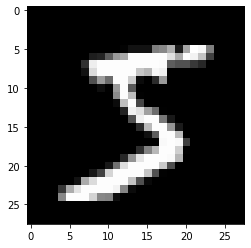

In [5]:
# Visualize X
img = np.array(Xtr[0].tolist())
plt.imshow(img.reshape(28, 28),cmap='gray')
plt.show()

In [6]:
# Multinomial sampling with replacement
rng = np.random.default_rng(seed=1)
def draw_batch(batch_size): 
    draw = lambda: int(rng.random() * len(Xtr))
    batch = [draw() for _ in range(batch_size)]
    return Xtr[batch], Ytr[batch]

def accuracy(split):
    x, y = {'train': (Xtr, Ytr), 'dev': (Xdev, Ydev), 'test': (Xte, Yte)}[split]
    global mlp
    x = mlp(x) # (7000, 10)
    correct = (x.data.argmax(1) == y.data.argmax(1)).sum()
    acc = (correct / len(x)) * 100
    print(f'{split}-accuracy: {acc:.2f}%')

In [7]:
mlp = nn.Sequential((
    nn.Linear(784, 512),
    nn.BatchNorm(512),
    nn.Tanh(),

    nn.Linear(512, 256),
    nn.BatchNorm(256),
    nn.Tanh(),

    nn.Linear(256, 128),
    nn.BatchNorm(128),
    nn.Tanh(),

    nn.Linear(128, 10, bias=False),
    nn.Softmax()
))
#mlp[0].W = mlp[0].W * 0.11
#mlp[2].W = mlp[2].W * 0.07
#mlp[4].W = mlp[4].W * 0.11
losses = []
dev_losses = []

std=9.666515705747623
std=0.9999999999999999
std=14.159642725957102
std=1.0
std=10.36710368108836
std=1.0
std=7.050238506934789
Step 0: train=11.53872066665441
Step 1: train=8.817914451860323
Step 2: train=9.829973448899413
Step 3: train=10.592179371359935
Step 4: train=8.583608267639498
Step 5: train=7.121898875348039
Step 6: train=6.691614599845734
Step 7: train=8.124414049802777
Step 8: train=6.775068281020131
Step 9: train=9.748172364565127
Step 10: train=7.431953800220765
Step 11: train=5.6718472805515034
Step 12: train=5.995981772675524
Step 13: train=6.226010839110062
Step 14: train=6.927217712155876
Step 15: train=5.130893319757444
Step 16: train=4.876436586199368
Step 17: train=5.7366458671997
Step 18: train=4.6656851853770425
Step 19: train=4.507428612108415
Step 20: train=2.8272046608831696
Step 21: train=5.266645277520971
Step 22: train=5.136563746538679
Step 23: train=2.3572170279991904
Step 24: train=4.341007332654078
Step 25: train=4.042733564041038
Step 26: train=5.7669

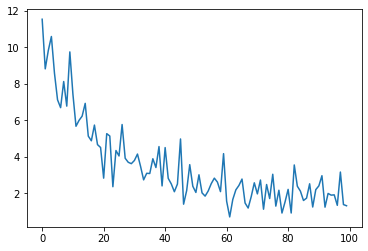

In [8]:
steps = 100
batch_size = 32
lr = 0.1
breakpoint = -1
for i in range(steps):
    x, y = draw_batch(batch_size)
    out = mlp(x, breakpoint=breakpoint, printstddev=(i==0))

    loss = nn.nlll(out, y, reduction='mean')
    loss.backward()

    mlp.optimize(lr=lr)
    mlp.zero_grad()

    loss = loss.data.item()
    losses.append(loss)
    #dev_loss = nn.nlll(mlp(Xdev), Ydev, reduction='mean').data.item()
    #dev_losses.append(dev_loss)
    #print(f'Step {i}: train={loss}, val={dev_loss}')
    print(f'Step {i}: train={loss}')

plt.plot(losses, label='train')
plt.plot(dev_losses, label='dev')
plt.show()

In [9]:
accuracy('test')

test-accuracy: 71.03%
